<a href="https://colab.research.google.com/github/VictorOmondi1997/exploring-whr/blob/master/exploring_whr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring the World Happiness Report

<center> Data Cleaning, Data Aggregation and Data Visualization</center>

World Happiness Report is an annual report created by the UN Sustainable Development Solutions Network with the intent of guiding policy. The report assigns each country a happiness score based on the answers to a poll question that asks respondents to rank their life on a scale of 0 - 10.

It also includes estimates of factors that may contribute to each country's happiness, including economic production, social support, life expectancy, freedom, absence of corruption, and generosity, to provide context for the score. Although these factors aren't actually used in the calculation of the happiness score, they can help illustrate why a country received a certain score.

# Questions

The following are the list of questions we need to find out in the dataset.

* How can aggregating the data give us more insight into happiness scores?
* How did world happiness change from 2015 to 2017?
* Which factors contribute the most to the happiness score?

# Data Aggregation

## Dataset

You can download the dataset [here](https://www.kaggle.com/unsdsn/world-happiness)

The data set is a CSV file called [`World_Happiness_2015.csv`](https://www.kaggle.com/unsdsn/world-happiness). Below are descriptions for columns:

|**Column**|**Description**|
|---|---|
|**`Country`**|Name of the country.|
|**`Region`**|Name of the region the country belongs to.|
|**`Happiness Rank`**|The rank of the country, as determined by its happiness score.|
|**`Happiness Score`**|A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10.|
|**`Family`**|The estimated extent to which family contributes to the happiness score.|
|**`Freedom`**|The estimated extent to which freedom contributes to the happiness score.|
|**`Generosity`**|The estimated extent to which generosity contributes to the happiness score.|

# Dataset Inspection

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [0]:
happiness2015 = pd.read_csv('https://dsserver-prod-resources-1.s3.amazonaws.com/343/World_Happiness_2015.csv?versionId=jQYOlRzzMPFpIhNjLxwFNWDSOAsdpjnN')
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [0]:
happiness2015.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [0]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# Mean Happiness Score by region

In [0]:
happiness2015.groupby('Region')['Happiness Score'].mean().sort_values()

Region
Sub-Saharan Africa                 4.202800
Southern Asia                      4.580857
Southeastern Asia                  5.317444
Central and Eastern Europe         5.332931
Middle East and Northern Africa    5.406900
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Western Europe                     6.689619
North America                      7.273000
Australia and New Zealand          7.285000
Name: Happiness Score, dtype: float64

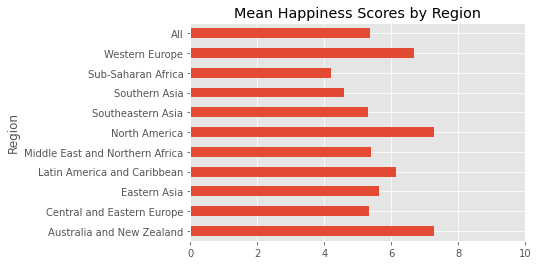

In [0]:
happiness2015.pivot_table(values='Happiness Score', index='Region', margins=True).plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)

# Did world happiness increase, decrease, or stay about the same from 2015 to 2017?

In [0]:
happiness2016 = pd.read_csv('https://dsserver-prod-resources-1.s3.amazonaws.com/344/World_Happiness_2016.csv?versionId=g2kGflhRQVfDoiUtXaBqfKoLx_BrgtJs')
happiness2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [0]:
happiness2017 = pd.read_csv('https://dsserver-prod-resources-1.s3.amazonaws.com/344/World_Happiness_2017.csv?versionId=VojSXR_mvHTzv41jGPwSvMFGZiHuKXCq')
happiness2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [0]:
for i,df in enumerate([happiness2015,happiness2016,happiness2017]):
    df['Year']=2015+i

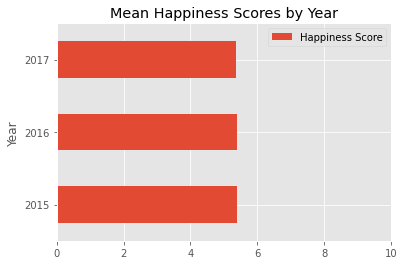

In [0]:
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)
combined = pd.concat([happiness2015, happiness2016, happiness2017])
combined.pivot_table(index='Year', values='Happiness Score').plot(kind='barh', title='Mean Happiness Scores by Year', xlim=(0,10))
plt.show()

mean world happiness score stayed approximately the same from 2015 to 2017.

# Exploring the factors that contribute happiness.

> the World Happiness Report assigns each country a happiness score based on a poll question that asks respondents to rank their life on a scale of 0 - 10.

The factors incluce:

* Economy (GDP per Capita)
* Family
* Health (Life Expectancy)
* Freedom
* Trust (Government Corruption)
* Generosity

# Which of the factors above contribute the most to the happiness score?

In [0]:
happiness2015=happiness2015.rename({'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }, axis=1)
happiness2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')

In [0]:
factors_impact=happiness2015[['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']].applymap(lambda x: 'High' if x > 1 else 'low')
factors_impact

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,low,low,low,low
1,High,High,low,low,low,low
2,High,High,low,low,low,low
3,High,High,low,low,low,low
4,High,High,low,low,low,low
...,...,...,...,...,...,...
153,low,low,low,low,low,low
154,low,low,low,low,low,low
155,low,low,low,low,low,low
156,low,low,low,low,low,low


> We can see from the results that, according to our definition, the `Economy` and `Family` columns had a high impact on the happiness scores of the first five countries.

In [0]:
factors_impact.apply(pd.value_counts)

,Economy,Family,Health,Freedom,Trust,Generosity
High,66,89,2,NaN,NaN,NaN
low,92,69,156,158.0,158.0,158.0


> Now, we can easily see that the `Family` and `Economy` columns contain the most `'High'` values!

In [0]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']
melt=pd.melt(happiness2015, id_vars=main_cols,value_vars=factors)
melt['Percentage']=round((melt.value/melt['Happiness Score'])*100,2)
melt.head()

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61
3,Norway,Western Europe,4,7.522,Economy,1.45900,19.40
4,Canada,North America,5,7.427,Economy,1.32629,17.86


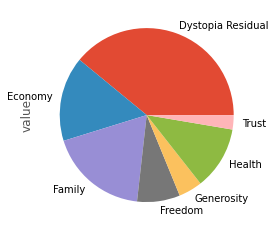

In [0]:
pv_melt=melt.pivot_table(index='variable', values='value')
pv_melt.plot(kind='pie', y='value', legend=False)
plt.show()